In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

In [4]:
import matplotlib.pyplot as plt

In [6]:
config_file=r'C:\Users\Jhanvi\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model=r'C:\Users\Jhanvi\Downloads\frozen_inference_graph.pb'

In [7]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [18]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 000001DFDF4CA810>

In [9]:
class_Labels=[]
file_name=r'C:\Users\Jhanvi\Downloads\coco.names'
with open(file_name,'rt') as fpt:
    class_Labels=fpt.read().rstrip('\n').split('\n')
    

In [10]:
print(class_Labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [14]:
img=cv2.imread(r'C:\Users\Jhanvi\OneDrive\Pictures\Camera Roll\bro.jpg')

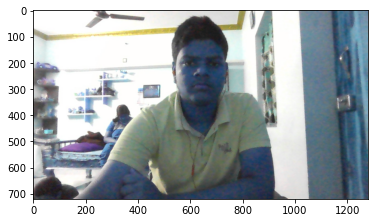

In [15]:
plt.imshow(img)

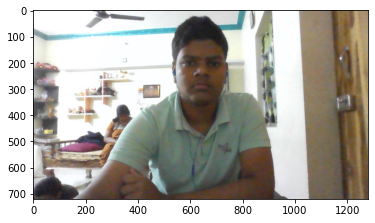

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
classindex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [20]:
classindex

array([1, 1, 1])

In [25]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classind,conf,boxes in zip(classindex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,class_Labels[classind-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)

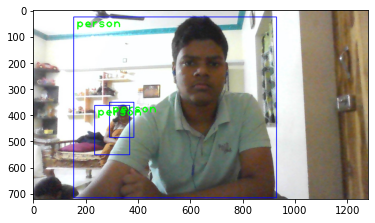

In [26]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [29]:
def detect(img):
    classindex,confidence,bbox=model.detect(img,confThreshold=0.5)
    font_scale=3
    font=cv2.FONT_HERSHEY_PLAIN
    for classind,conf,boxes in zip(classindex.flatten(),confidence.flatten(),bbox):
        cv2.rectangle(img,boxes,(255,0,0),2)
        cv2.putText(img,class_Labels[classind-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=3)
    

In [36]:
img1=cv2.imread(r'C:\Users\Jhanvi\OneDrive\Pictures\Camera Roll\Happyimg.jpeg')

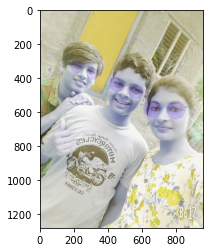

In [37]:
plt.imshow(img1)

In [38]:
detect(img1)

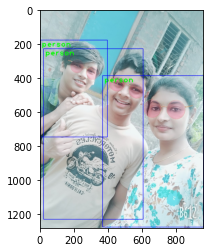

In [40]:
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

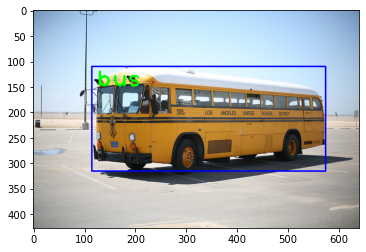

In [41]:
bus=cv2.imread(r'C:\Users\Jhanvi\Downloads\bus.jpg')
detect(bus)
plt.imshow(cv2.cvtColor(bus,cv2.COLOR_BGR2RGB))

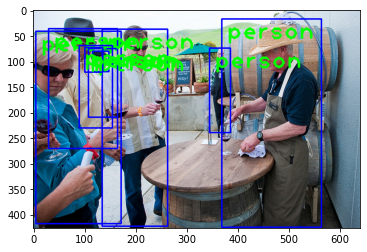

In [48]:
imgx=cv2.imread(r'C:\Users\Jhanvi\Downloads\coco-persons.jpg')
detect(imgx)
plt.imshow(cv2.cvtColor(imgx,cv2.COLOR_BGR2RGB))